In [1]:
from utilities import time_evolve, to_dm
from Species import Ca40
from construct_H_tree import construct_H_tree
from structures import Laser, Chain
from Chamber import Chamber
ion = Ca40([("S1/2", -1/2, "S"), ("D5/2", -1/2, "D")])

from math import sqrt
import numpy as np

laser = Laser(phi=0, k_hat=np.array([1,0,1])/sqrt(2), eps_hat = 
               np.array([1, 0, -1])/sqrt(2))

chain = Chain([ion], trap_freqs=[3e6, 3e6, 1e6], selected_modes=[])

mode = chain.modes[-1]
mode.modecutoff(10)

chain.selected_modes = [mode] # consider one mode

chamber = Chamber(chain = chain, lasers = [laser], 
                  B = 4e-4, Bhat = np.array([0,0,1]))


chamber.set_laser_wavelength_from_transition(0, ion.transition(("S", "D")))
chamber.set_laser_intensity_from_pi_time(0, 2e-6, ion.transition(("S", "D")))

timescale = 1e-6
duration = 50

times = np.linspace(0, duration, 1000)



H_tree = construct_H_tree(chamber, timescale)
H_tree.apply_ld_and_rwa_approximations(n_cutoff = mode.N, ld_cond_th = 1e-2, rwa_cutoff = 'inf')



Expanding to 3rd order in the Lamb-Dicke approximation


In [2]:
from qutip import thermal_dm, tensor
psi_ion = to_dm(ion.state["S"])

nbar = 5
psi_mot = thermal_dm(mode.N, nbar)

psi_0 = tensor(psi_ion, psi_mot)

op1 = chain.ion_projector(1, "S")
op2 = chain.ion_projector(1, "D")

results = time_evolve(H_tree, psi_0, times, expt_ops=[op1, op2], progress_bar= True)

10.0%. Run time:   2.30s. Est. time left: 00:00:00:20
20.0%. Run time:   4.16s. Est. time left: 00:00:00:16
30.0%. Run time:   6.08s. Est. time left: 00:00:00:14
40.0%. Run time:   8.02s. Est. time left: 00:00:00:12
50.1%. Run time:   9.83s. Est. time left: 00:00:00:09
60.1%. Run time:  11.74s. Est. time left: 00:00:00:07
70.1%. Run time:  13.74s. Est. time left: 00:00:00:05
80.1%. Run time:  15.74s. Est. time left: 00:00:00:03
90.1%. Run time:  17.72s. Est. time left: 00:00:00:01
100.0%. Run time:  19.74s. Est. time left: 00:00:00:00
Total run time:  19.74s


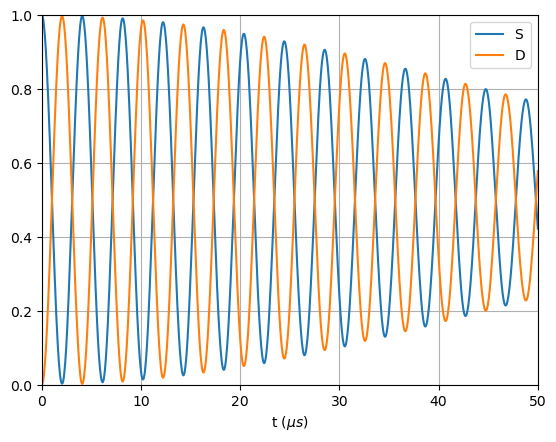

In [3]:
results.quick_plot()